# Project: PRCP-1013-WalkRunClass

# Business Case: Developing a Run/Walk Classification Model

## Problem Statement 

  To develop a machine learning classification model that accurately distinguishes between running and walking activities based on sensor data. Multi-layer neural networks will be trained and evaluated based on data from Run or
Walk Reduced dataset.

# Tasks

### Task 1: Prepare a complete data analysis report on the given data.
### Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

In [2]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data
data=pd.read_csv('walkrun.csv')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


# Domain Analysis
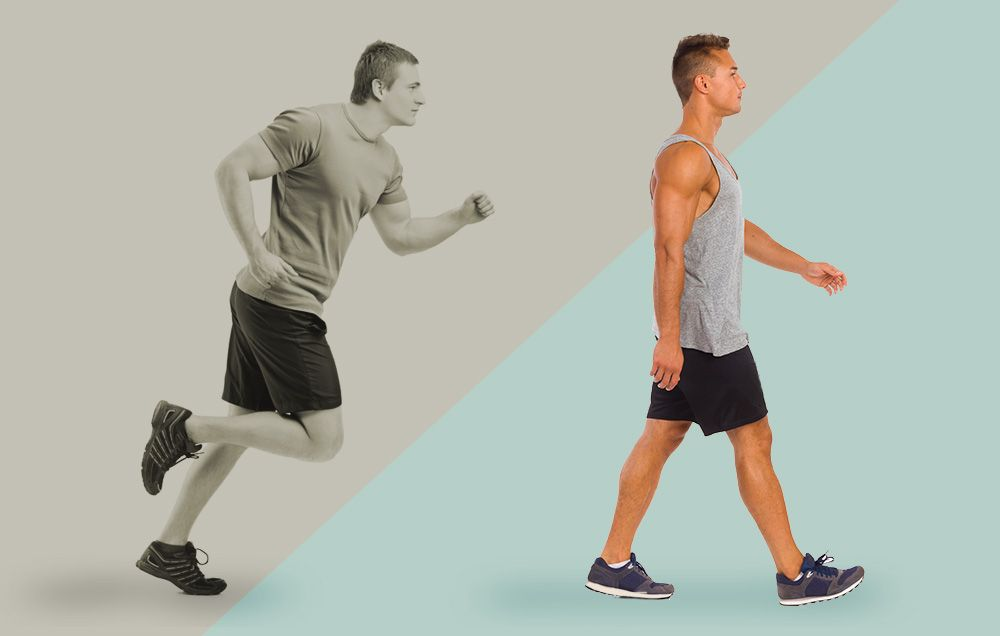

### In this dataset, we have 11 columns of parameters for RunWalk Classification and 88588 rows of data.
******

#### Input Variable

   **Date:** 
    
        This column typically represents the date on which the activity  data was recorded.
   **Time:** 
    
        This column represents the time of day when the activity or motion data was recorded.
   **Username:** 

        This column may contain the usernames or identifiers of individuals or users associated with the recorded data.
   **Wrist:** 
   
        This column indicates the specific wrist where the wearable device or sensor was placed. It can be "left,"
        "right," or some other identifier to indicate the location of the sensor on the body.
   **Acceleration_x:**
   
        These columns typically contain numerical values representing the acceleration of motion along the x-axis. 
        Acceleration measures how quickly an object is changing its velocity. In the context of a wearable sensor,
        this could represent acceleration in a horizontal direction.
   **Acceleration_y:** 
   
        Similar to the previous column, this one represents the acceleration along the y-axis. It may indicate motion
        in a vertical direction or another orientation, depending on how the wearable device is positioned.
   **Acceleration_z:** 
   
        This column represents the acceleration along the z-axis. It typically measures motion in a depth or 
        front-to-back direction.
   **Gyro_x:** 
   
        These columns contain numerical values representing the angular velocity (rate of rotation) around the x-axis.
        Gyroscopic sensors measure the rate of change of orientation or rotation.
   **Gyro_y:**
   
        Similar to the previous column, this one represents angular velocity around the y-axis.
   **Gyro_z:**

        This column represents angular velocity around the z-axis. It measures rotational motion around a 
        vertical axis.
        
#### Output Variable

   **Activity:**
   
        This column contains labels or descriptions of the physical activities being performed, such as "walking,"
        "running". 
        Walking = 0
        Running = 1

# Basic checks

In [4]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [8]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [9]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [10]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [11]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

    There is no missing values in this data set

In [12]:
data.duplicated().sum()

0

    There is no duplicate values in this data set

### Task 1: Prepare a complete data analysis report on the given data.

# Explotary Data Analysis

## Univariate Analysis

<Axes: xlabel='gyro_z', ylabel='Count'>

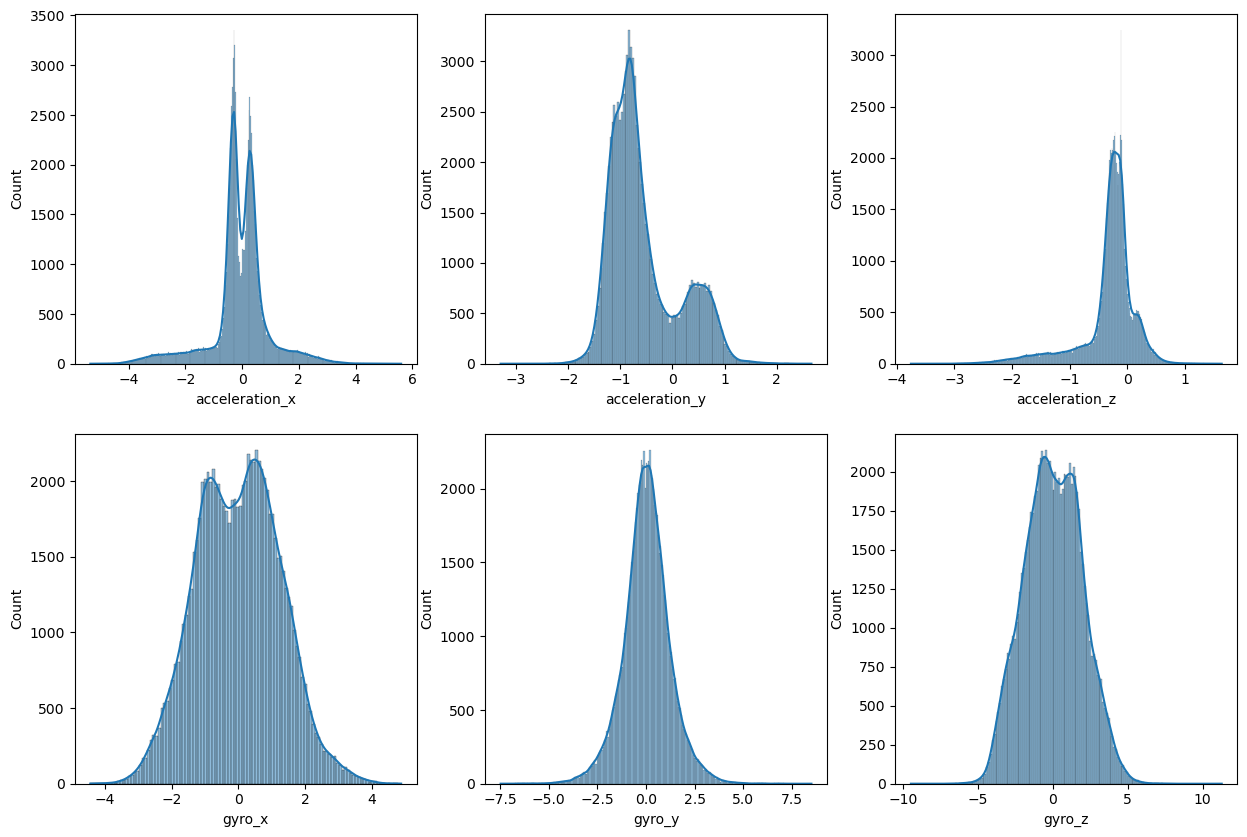

In [14]:
# check the distribution
# Histplot
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(data['acceleration_x'],kde=True)
plt.subplot(2,3,2)
sns.histplot(data['acceleration_y'],kde=True)
plt.subplot(2,3,3)
sns.histplot(data['acceleration_z'],kde=True)
plt.subplot(2,3,4)
sns.histplot(data['gyro_x'],kde=True)
plt.subplot(2,3,5)
sns.histplot(data['gyro_y'],kde=True)
plt.subplot(2,3,6)
sns.histplot(data['gyro_z'],kde=True)

# Insights

    * The columns do not follow a normal distribution because they record a person's daily routine, highlighting the 
    inconsistency in their walking and running habits. There are no discernible distributions in these columns.
   
          

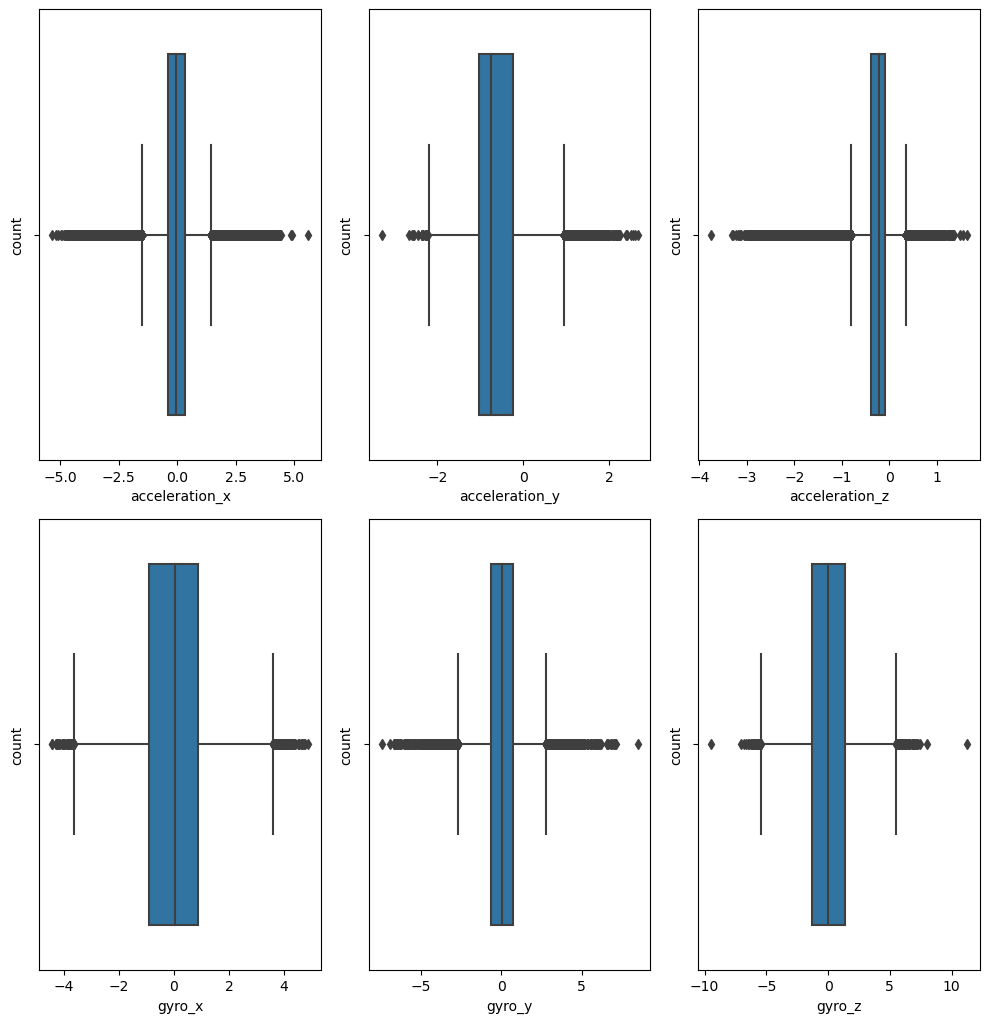

In [106]:
#boxplot
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(x=num_data[column],data=num_data)
    plt.xlabel(column)
    plt.ylabel('count')
    plotnumber +=1
plt.tight_layout()
plt.show()

# Insights

     * After examining the box plot graphs, it is evident that there are outliers in the columns 'activity,' 
     'acceleration_x,','acceleration_y,' 'acceleration_z,' 'gyro_x,' 'gyro_y,' and 'gyro_z.'

# Bivariate Analysis 

<Axes: xlabel='gyro_z', ylabel='Density'>

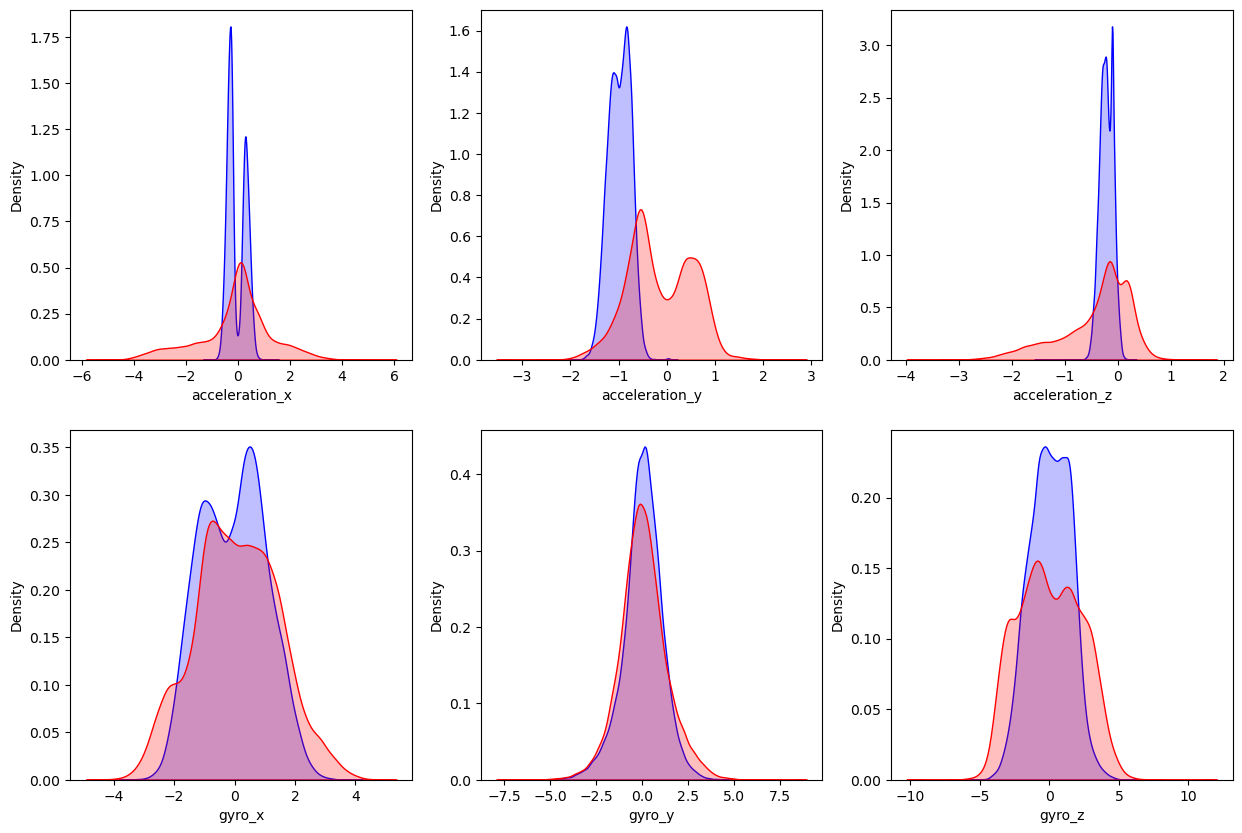

In [108]:
# Histplot
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(data[data['activity'] == 0]['acceleration_x'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['acceleration_x'], label='Activity 1', color='red', shade=True)
plt.subplot(2,3,2)
sns.kdeplot(data[data['activity'] == 0]['acceleration_y'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['acceleration_y'], label='Activity 1', color='red', shade=True)
plt.subplot(2,3,3)
sns.kdeplot(data[data['activity'] == 0]['acceleration_z'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['acceleration_z'], label='Activity 1', color='red', shade=True)
plt.subplot(2,3,4)
sns.kdeplot(data[data['activity'] == 0]['gyro_x'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['gyro_x'], label='Activity 1', color='red', shade=True)
plt.subplot(2,3,5)
sns.kdeplot(data[data['activity'] == 0]['gyro_y'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['gyro_y'], label='Activity 1', color='red', shade=True)
plt.subplot(2,3,6)
sns.kdeplot(data[data['activity'] == 0]['gyro_z'], label='Activity 0', color='blue', shade=True)
sns.kdeplot(data[data['activity'] == 1]['gyro_z'], label='Activity 1', color='red', shade=True)

# Insights

**acceleration x :**
  
      when the acceleration x is -1 to 1,it implies the user is walking and if b/w -4 to 4 the user is running
**acceleration y :**

      if the acceleration is b/w -2 t 0,the user is walking and if b/w -2 to 2 the user is running

**acceleration z :**

      if the acceleration is b/w -1 to 0,user is walking and if b/w 3 to 1 user is running

##### note:there is no big no huge difference blw values in gyro compared to accelerometer

**gyro x :**

      if the gyro is b/w -3 t 3,the user is walking and if b/w -4 to 4 the user is running

**gyro y :**

      if the gyro is b/w -4 t 4,the user is walking and if b/w -6 to 6 the user is running
**gyro z :**

      if the gyro is b/w -5 t 5,the user is walking and if b/w -4.5 to 4.5 the user is running

# Mutlivariate Analysis

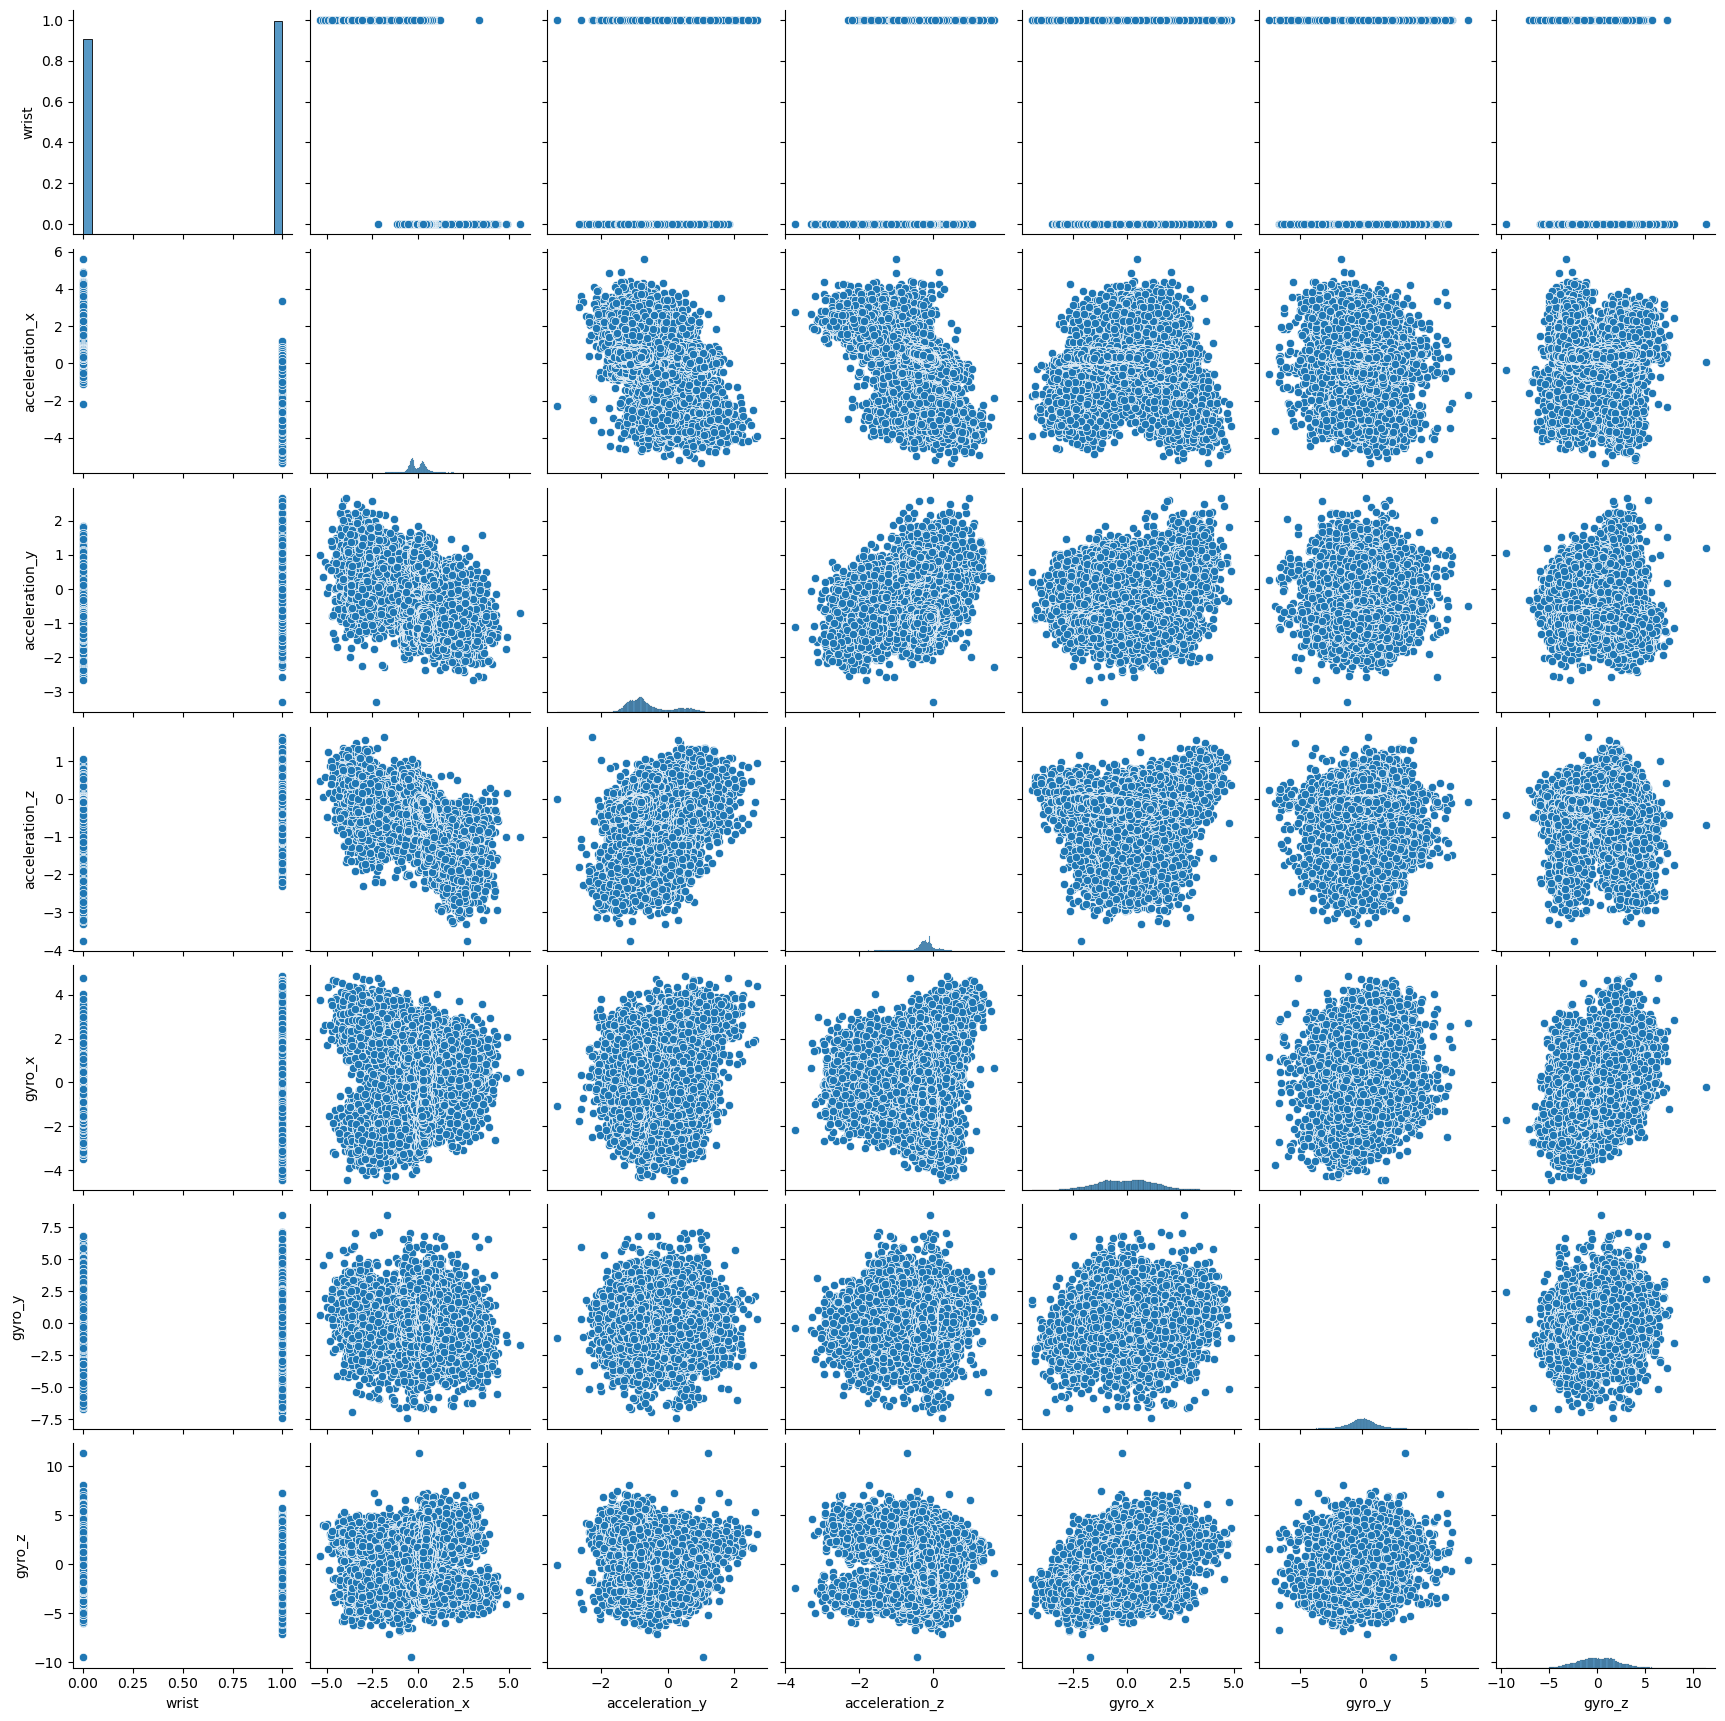

In [15]:
#pair plot
sns.pairplot(data.drop('activity',axis=True))

# Data Preprocessing

    * The datatypes of date and time is object.So,firstly 
      we convert it into date and time for proper predicion.

In [12]:
# Change datatype object into datetime format
data['date']=pd.to_datetime(data['date'])
data['time']=pd.to_datetime(data['time'],format='%H:%M:%S:%f')

In [ ]:
# To extract the 'time' column into new columns 'hour','minute' and 'secound' for prediction purposes

In [13]:
data['hour']=data['time'].dt.hour
data['minute']=data['time'].dt.minute
data['second']=data['time'].dt.second

In [ ]:
# To extract the 'date' column into new columns 'day','dayofweek','nthday' and 'Month' for prediction purposes

In [14]:
data['nthday']=data['date'].dt.dayofweek
data['dayofweek']=data['date'].dt.day_name()
data['day']=data['date'].dt.day
data['Month']=data['date'].dt.month

In [15]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,1900-01-01 13:51:15.847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,13,51,15,4,Friday,30,6
1,2017-06-30,1900-01-01 13:51:16.246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,13,51,16,4,Friday,30,6
2,2017-06-30,1900-01-01 13:51:16.446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,13,51,16,4,Friday,30,6
3,2017-06-30,1900-01-01 13:51:16.646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,13,51,16,4,Friday,30,6
4,2017-06-30,1900-01-01 13:51:16.846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,13,51,16,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-07-09,1900-01-01 20:09:15.317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,20,9,15,6,Sunday,9,7
88584,2017-07-09,1900-01-01 20:09:15.517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,20,9,15,6,Sunday,9,7
88585,2017-07-09,1900-01-01 20:09:15.717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,20,9,15,6,Sunday,9,7
88586,2017-07-09,1900-01-01 20:09:15.917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,20,9,15,6,Sunday,9,7


### Check the Outliers

    * After checking boxplot graph, we have outliers in 'activity', 'acceleration_x','acceleration_y', 'acceleration_z',
     'gyro_x', 'gyro_y', 'gyro_z'.

### acceleration_x

In [16]:
# Finding Outlier in A
Q1=data['acceleration_x'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['acceleration_x'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -0.3818
upper quantile : 0.3555
IQR : 0.7373
lower_limit : -1.48775
upper_limit : 1.46145


In [17]:
# find the values of above upper limit
data.loc[data.acceleration_x>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
761,2017-06-30,1900-01-01 20:33:45.457786977,viktor,0,1,1.5466,-1.1082,-0.2509,0.8609,-0.4994,-1.6458,20,33,45,4,Friday,30,6
794,2017-06-30,1900-01-01 20:33:52.577480190,viktor,0,1,1.5584,-1.0274,-0.3310,-1.1249,2.3090,3.4477,20,33,52,4,Friday,30,6
804,2017-06-30,1900-01-01 20:33:54.587869880,viktor,0,1,3.3880,-0.1490,-0.1416,1.8600,1.8447,-1.7263,20,33,54,4,Friday,30,6
806,2017-06-30,1900-01-01 20:34:01.757506012,viktor,0,1,2.1690,-0.8969,-0.4853,-1.0288,3.0830,3.2277,20,34,1,4,Friday,30,6
807,2017-06-30,1900-01-01 20:34:01.957579970,viktor,0,1,3.4887,-1.0723,-0.1066,2.3324,-1.1111,-2.1490,20,34,1,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87729,2017-07-09,1900-01-01 20:06:10.716030001,viktor,0,1,2.2489,-0.5623,-1.8833,-0.1630,0.0703,-2.8685,20,6,10,6,Sunday,9,7
87731,2017-07-09,1900-01-01 20:06:11.115936994,viktor,0,1,1.8530,-1.2641,-1.9198,-0.5848,1.1991,1.8042,20,6,11,6,Sunday,9,7
87737,2017-07-09,1900-01-01 20:06:12.315982997,viktor,0,1,1.4954,-1.0511,-1.6060,0.4787,-1.2197,-2.4586,20,6,12,6,Sunday,9,7
87752,2017-07-09,1900-01-01 20:06:15.315971016,viktor,0,1,2.5963,-0.4055,-2.4827,0.2144,0.2478,-2.0818,20,6,15,6,Sunday,9,7


In [18]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_x>upper_limit])/len(data))

0.05402537589741274

In [19]:
#find the vales below lower limit
data.loc[data.acceleration_x<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
8329,2017-07-11,1900-01-01 17:42:12.881653010,viktor,1,1,-1.8268,-0.7392,-0.4644,0.9234,1.6628,1.7441,17,42,12,1,Tuesday,11,7
8331,2017-07-11,1900-01-01 17:42:13.281655013,viktor,1,1,-2.5088,0.2492,-0.1247,-1.9650,-0.1891,-1.4122,17,42,13,1,Tuesday,11,7
8333,2017-07-11,1900-01-01 17:42:13.681699991,viktor,1,1,-2.1378,-0.6646,-0.1353,0.9627,0.8825,1.2429,17,42,13,1,Tuesday,11,7
8335,2017-07-11,1900-01-01 17:42:14.822039840,viktor,1,1,-2.1445,0.3559,-0.4881,-2.0196,-0.9755,-1.8590,17,42,14,1,Tuesday,11,7
8346,2017-07-11,1900-01-01 17:42:16.281822979,viktor,1,1,-1.9969,-1.0779,-0.6939,-0.0120,2.3133,-5.4989,17,42,16,1,Tuesday,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54796,2017-07-17,1900-01-01 20:10:02.287325978,viktor,1,1,-2.6131,-0.8013,0.8038,-3.1318,-1.0966,-2.1135,20,10,2,0,Monday,17,7
54798,2017-07-17,1900-01-01 20:10:02.687865972,viktor,1,1,-2.1329,1.4209,-0.3964,2.4474,2.3875,2.9207,20,10,2,0,Monday,17,7
54800,2017-07-17,1900-01-01 20:10:03.873320100,viktor,1,1,-3.0454,-0.0096,0.1557,-2.6437,-2.9311,-3.3749,20,10,3,0,Monday,17,7
54802,2017-07-17,1900-01-01 20:10:03.487329006,viktor,1,1,-3.0619,1.2824,0.5984,3.9788,0.4811,1.8914,20,10,3,0,Monday,17,7


In [20]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_x<lower_limit])/len(data))

0.07685013771616923

# Insight 

       * We have outliers exceeding 5%, so this is our main data.

### acceleration_y

In [21]:
# Finding Outlier in acceleration_y
Q1=data['acceleration_y'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['acceleration_y'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -1.0335
upper quantile : -0.241775
IQR : 0.7917250000000001
lower_limit : -2.2210875000000003
upper_limit : 0.9458125000000003


In [22]:
# find the values of above upper limit
data.loc[data.acceleration_y>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
803,2017-06-30,1900-01-01 20:33:53.857743978,viktor,0,1,0.5458,1.0347,-0.2085,-1.3673,0.6324,0.7227,20,33,53,4,Friday,30,6
814,2017-06-30,1900-01-01 20:34:03.357452988,viktor,0,1,0.0456,1.0885,-0.2076,0.0650,-0.2160,-1.0235,20,34,3,4,Friday,30,6
818,2017-06-30,1900-01-01 20:34:04.157447993,viktor,0,1,0.1848,0.9479,-0.2640,-0.1240,0.0956,-0.6674,20,34,4,4,Friday,30,6
822,2017-06-30,1900-01-01 20:34:04.957527995,viktor,0,1,-0.0065,0.9514,-0.0914,-0.3194,0.1613,-0.5796,20,34,4,4,Friday,30,6
826,2017-06-30,1900-01-01 20:34:05.757667005,viktor,0,1,0.1477,1.0921,-0.2145,0.4663,-0.2417,-1.7537,20,34,5,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87635,2017-07-09,1900-01-01 20:06:31.516337990,viktor,0,1,0.5270,1.0484,-0.5358,-0.6155,-0.9295,-0.3219,20,6,31,6,Sunday,9,7
87639,2017-07-09,1900-01-01 20:06:32.315617978,viktor,0,1,0.0657,1.0242,-0.2410,-0.7306,-0.1505,-1.1490,20,6,32,6,Sunday,9,7
87643,2017-07-09,1900-01-01 20:06:33.116357982,viktor,0,1,-0.2425,0.9598,-0.1213,-0.1654,-0.0856,-2.0006,20,6,33,6,Sunday,9,7
87709,2017-07-09,1900-01-01 20:06:06.716341972,viktor,0,1,-0.1979,1.0738,-0.0464,-1.0136,0.7744,-0.7605,20,6,6,6,Sunday,9,7


In [23]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_y>upper_limit])/len(data))

0.01772249063078521

In [24]:
#find the vales below lower limit
data.loc[data.acceleration_y<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
8543,2017-07-11,1900-01-01 17:42:56.487833976,viktor,1,1,-3.0482,-2.2451,-1.8759,-1.3992,-2.3370,-3.3193,17,42,56,1,Tuesday,11,7
10214,2017-07-11,1900-01-01 17:49:58.345283985,viktor,1,1,-1.8703,-2.2693,1.6403,0.6478,0.4910,-0.9244,17,49,58,1,Tuesday,11,7
10216,2017-07-11,1900-01-01 17:49:58.745341002,viktor,1,1,-2.2993,-3.2990,-0.0016,-1.0608,-1.2019,-0.0761,17,49,58,1,Tuesday,11,7
10332,2017-07-11,1900-01-01 17:50:02.553035974,viktor,1,1,-1.9295,-2.2278,-2.1881,-0.2238,-0.0462,-1.7832,17,50,2,1,Tuesday,11,7
50569,2017-07-17,1900-01-01 20:10:49.683843970,viktor,1,1,3.3692,-2.5771,-1.0668,0.3401,5.9783,-3.9640,20,10,49,0,Monday,17,7
64225,2017-07-04,1900-01-01 19:32:44.797133028,viktor,0,1,0.3944,-2.3603,-2.3496,1.4271,1.4882,3.2883,19,32,44,1,Tuesday,4,7
64878,2017-07-04,1900-01-01 19:38:20.897745013,viktor,0,1,2.0664,-2.3314,-2.0301,1.5704,0.3080,3.2379,19,38,20,1,Tuesday,4,7
65825,2017-07-04,1900-01-01 19:45:41.346678018,viktor,0,1,2.3162,-2.2479,-2.3430,-2.5099,0.7225,-1.5854,19,45,41,1,Tuesday,4,7
69839,2017-07-06,1900-01-01 18:38:20.443379998,viktor,0,1,3.6007,-2.5874,-1.2846,-1.2192,0.3319,1.4732,18,38,20,3,Thursday,6,7
71814,2017-07-06,1900-01-01 18:45:56.408940970,viktor,0,1,1.2493,-2.3646,-1.7842,1.5406,-0.9656,2.5057,18,45,56,3,Thursday,6,7


In [25]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_y<lower_limit])/len(data))

0.00020318779067142278

In [26]:
#check the median
data.acceleration_y.median()

-0.7591

In [27]:
# replace the outlier with median(upper limit)
data.loc[data['acceleration_y']>upper_limit,'acceleration_y']=data['acceleration_y'].median()

In [28]:
# replace the outlier with median(lower limit)
data.loc[data['acceleration_y']<lower_limit,'acceleration_y']=data['acceleration_y'].median()

In [29]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_y<lower_limit])/len(data))

0.0

In [30]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_y>upper_limit])/len(data))

0.0

### acceleration_z

In [31]:
# Finding Outlier in acceleration_z
Q1=data['acceleration_z'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['acceleration_z'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -0.376
upper quantile : -0.0859
IQR : 0.2901
lower_limit : -0.81115
upper_limit : 0.34925000000000006


In [32]:
# find the values of above upper limit
data.loc[data.acceleration_z>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
1041,2017-06-30,1900-01-01 20:35:30.306410014,viktor,0,1,-0.4445,-0.7503,0.3621,0.6251,-0.3076,1.3586,20,35,30,4,Friday,30,6
1049,2017-06-30,1900-01-01 20:35:31.907021999,viktor,0,1,-0.4780,-0.5880,0.4134,-0.0926,-0.2095,0.9744,20,35,31,4,Friday,30,6
1057,2017-06-30,1900-01-01 20:35:33.506633996,viktor,0,1,-0.4274,-0.5622,0.3604,-0.0346,-0.1810,1.2706,20,35,33,4,Friday,30,6
1061,2017-06-30,1900-01-01 20:35:34.306286990,viktor,0,1,-0.5723,-0.5994,0.3602,1.1863,-0.5626,0.3163,20,35,34,4,Friday,30,6
1078,2017-06-30,1900-01-01 20:35:54.389981985,viktor,0,1,-0.1973,-0.7251,0.3757,-1.2883,0.4394,2.8567,20,35,54,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87641,2017-07-09,1900-01-01 20:06:32.716583013,viktor,0,1,-0.6279,-0.5212,0.5046,1.4158,0.1346,0.8172,20,6,32,6,Sunday,9,7
87707,2017-07-09,1900-01-01 20:06:06.316078007,viktor,0,1,-0.5376,-0.3564,0.4843,1.2667,-0.4164,0.4760,20,6,6,6,Sunday,9,7
87711,2017-07-09,1900-01-01 20:06:07.116213977,viktor,0,1,-0.5455,-0.3352,0.5220,0.9665,0.5541,2.4329,20,6,7,6,Sunday,9,7
87730,2017-07-09,1900-01-01 20:06:10.915977001,viktor,0,1,-0.7480,-0.4755,0.5966,1.5635,-0.0745,0.2933,20,6,10,6,Sunday,9,7


In [33]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_z>upper_limit])/len(data))

0.028175373639770622

In [34]:
#find the vales below lower limit
data.loc[data.acceleration_z<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
817,2017-06-30,1900-01-01 20:34:03.957686007,viktor,0,1,2.8641,-1.0998,-0.8614,-0.5602,-0.6288,2.4683,20,34,3,4,Friday,30,6
821,2017-06-30,1900-01-01 20:34:04.757453978,viktor,0,1,2.8314,-0.9437,-0.9767,-1.3681,0.7702,2.3239,20,34,4,4,Friday,30,6
825,2017-06-30,1900-01-01 20:34:05.556971013,viktor,0,1,3.0883,-1.4509,-1.0165,-0.9526,-0.4552,3.0044,20,34,5,4,Friday,30,6
829,2017-06-30,1900-01-01 20:34:06.357590019,viktor,0,1,2.7703,-1.5968,-1.1892,-0.5883,-0.5169,2.6865,20,34,6,4,Friday,30,6
831,2017-06-30,1900-01-01 20:34:06.757507026,viktor,0,1,3.1003,-0.9753,-0.9276,0.9348,-1.2662,-3.0832,20,34,6,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87743,2017-07-09,1900-01-01 20:06:13.515973985,viktor,0,1,0.8215,0.2774,-0.8815,-0.8177,1.7098,1.3636,20,6,13,6,Sunday,9,7
87748,2017-07-09,1900-01-01 20:06:14.516231000,viktor,0,1,0.9145,0.1193,-1.0218,-0.4442,-0.4101,-3.0229,20,6,14,6,Sunday,9,7
87750,2017-07-09,1900-01-01 20:06:14.916516005,viktor,0,1,0.4733,-0.8527,-1.1410,0.6127,1.6790,4.8951,20,6,14,6,Sunday,9,7
87752,2017-07-09,1900-01-01 20:06:15.315971016,viktor,0,1,2.5963,-0.4055,-2.4827,0.2144,0.2478,-2.0818,20,6,15,6,Sunday,9,7


In [35]:
# Checking the percentage of outlier
(len(data.loc[data.acceleration_z<lower_limit])/len(data))

0.11447374362216102

# Insight 

       * We have outliers exceeding 5%, so this is our main data.

### gyro_x

In [36]:
# Finding Outlier in gyro_x
Q1=data['gyro_x'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['gyro_x'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -0.9207
upper quantile : 0.8888
IQR : 1.8094999999999999
lower_limit : -3.63495
upper_limit : 3.6030499999999996


In [37]:
# find the values of above upper limit
data.loc[data.gyro_x>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
3051,2017-06-30,1900-01-01 20:55:07.473541021,viktor,0,1,0.2921,-1.0401,-0.1290,3.6203,-0.0482,3.1863,20,55,7,4,Friday,30,6
10384,2017-07-11,1900-01-01 17:50:33.153665006,viktor,1,1,-3.6923,-0.7591,0.4974,4.2095,-1.1343,1.7131,17,50,33,1,Tuesday,11,7
11941,2017-07-11,1900-01-01 17:55:50.754446029,viktor,1,1,-4.1032,0.9394,0.1612,3.6571,-0.3990,3.5440,17,55,50,1,Tuesday,11,7
12255,2017-07-11,1900-01-01 17:56:55.676770210,viktor,1,1,-3.9639,0.7473,0.1752,3.8617,2.0993,3.0872,17,56,55,1,Tuesday,11,7
12883,2017-07-11,1900-01-01 17:59:13.270732998,viktor,1,1,-2.8710,-0.7591,0.8017,3.8158,-0.2503,1.0515,17,59,13,1,Tuesday,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65921,2017-07-04,1900-01-01 19:46:16.911925971,viktor,0,0,0.3448,-1.2935,-0.4627,3.6740,0.6279,3.1544,19,46,16,1,Tuesday,4,7
71675,2017-07-06,1900-01-01 18:45:28.200726985,viktor,0,1,0.2153,-1.3289,-0.1083,3.7517,1.4350,6.1466,18,45,28,3,Thursday,6,7
73737,2017-07-06,1900-01-01 18:53:22.876851022,viktor,0,1,2.2659,0.0483,-0.6037,3.6999,1.1425,-0.9590,18,53,22,3,Thursday,6,7
78583,2017-07-07,1900-01-01 11:50:05.480479001,viktor,0,0,0.4138,-1.3342,-0.3756,3.7956,-0.8160,4.7429,11,50,5,4,Friday,7,7


In [38]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_x>upper_limit])/len(data))

0.002133471802049939

In [39]:
#find the vales below lower limit
data.loc[data.gyro_x<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
12444,2017-07-11,1900-01-01 17:57:33.669340014,viktor,1,1,-3.1479,0.0079,-0.7012,-3.8630,-1.2002,-1.2344,17,57,33,1,Tuesday,11,7
12640,2017-07-11,1900-01-01 17:58:23.668157994,viktor,1,1,-2.1529,0.3787,-0.2573,-3.6546,-2.6273,-4.6280,17,58,23,1,Tuesday,11,7
13548,2017-07-11,1900-01-01 18:01:28.865957975,viktor,1,1,-3.6288,-0.4976,-0.0995,-3.7646,-6.9557,-1.7011,18,1,28,1,Tuesday,11,7
13798,2017-07-11,1900-01-01 18:02:19.870468974,viktor,1,1,-2.6890,-0.1024,-0.7970,-3.7036,-1.3734,-1.7167,18,2,19,1,Tuesday,11,7
14049,2017-07-11,1900-01-01 18:03:01.687130090,viktor,1,1,-1.2420,-0.8847,0.5733,-4.2582,-2.9323,-4.0612,18,3,1,1,Tuesday,11,7
15674,2017-07-15,1900-01-01 18:11:35.438868999,viktor,1,1,-1.7345,0.5037,0.2280,-4.4276,1.5328,-1.5076,18,11,35,5,Saturday,15,7
15701,2017-07-15,1900-01-01 18:11:40.839106976,viktor,1,1,-2.5112,0.2059,0.3163,-4.0243,-1.1363,-3.0770,18,11,40,5,Saturday,15,7
15743,2017-07-15,1900-01-01 18:11:49.439447999,viktor,1,1,-2.3290,0.0703,0.5508,-4.1589,-1.7990,-1.4788,18,11,49,5,Saturday,15,7
15833,2017-07-15,1900-01-01 18:12:17.840313017,viktor,1,1,-2.1356,0.4180,-0.0093,-3.6497,0.0413,-1.5848,18,12,17,5,Saturday,15,7
16552,2017-07-15,1900-01-01 18:14:34.639487028,viktor,1,1,-1.3744,-0.4055,0.0602,-3.7789,-1.1875,-1.8542,18,14,34,5,Saturday,15,7


In [40]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_x<lower_limit])/len(data))

0.00040637558134284555

In [41]:
#check the median
data.gyro_x.median()

0.0187

In [42]:
# replace the outlier with median(upper limit)
data.loc[data['gyro_x']>upper_limit,'gyro_x']=data['gyro_x'].median()

In [43]:
# replace the outlier with median(lower limit)
data.loc[data['gyro_x']<lower_limit,'gyro_x']=data['gyro_x'].median()

In [44]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_x>upper_limit])/len(data))

0.0

In [45]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_x<lower_limit])/len(data))

0.0

### gyro_y

In [46]:
# Finding Outlier in gyro_y
Q1=data['gyro_y'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['gyro_y'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -0.644825
upper quantile : 0.7337
IQR : 1.378525
lower_limit : -2.7126125
upper_limit : 2.8014875000000004


In [47]:
# find the values of above upper limit
data.loc[data.gyro_y>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
806,2017-06-30,1900-01-01 20:34:01.757506012,viktor,0,1,2.1690,-0.8969,-0.4853,-1.0288,3.0830,3.2277,20,34,1,4,Friday,30,6
939,2017-06-30,1900-01-01 20:34:45.640227019,viktor,0,1,4.2238,-0.5313,-0.0497,2.3511,3.7946,-1.4452,20,34,45,4,Friday,30,6
949,2017-06-30,1900-01-01 20:34:47.640263020,viktor,0,1,2.4385,-1.0021,-0.3412,-1.3086,3.0251,3.5416,20,34,47,4,Friday,30,6
1162,2017-06-30,1900-01-01 20:36:30.122624993,viktor,0,1,2.2904,-1.3012,-0.5302,-1.7653,3.6325,3.5509,20,36,30,4,Friday,30,6
1225,2017-06-30,1900-01-01 20:37:09.373520016,viktor,0,1,2.1224,-1.1224,-0.3451,-2.1148,3.1223,3.8648,20,37,9,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88228,2017-07-09,1900-01-01 20:08:52.918063998,viktor,0,0,0.4471,-0.8132,-0.1947,0.0891,3.5109,0.3621,20,8,52,6,Sunday,9,7
88296,2017-07-09,1900-01-01 20:08:06.916352987,viktor,0,0,0.4508,-0.8620,-0.2102,0.4976,2.9574,0.5350,20,8,6,6,Sunday,9,7
88348,2017-07-09,1900-01-01 20:09:17.517454981,viktor,0,0,0.2878,-0.9886,-0.1019,-0.0195,2.8317,1.4174,20,9,17,6,Sunday,9,7
88354,2017-07-09,1900-01-01 20:09:18.716318011,viktor,0,0,0.2176,-0.8891,-0.0477,0.1856,3.0879,0.6965,20,9,18,6,Sunday,9,7


In [48]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_y>upper_limit])/len(data))*100

1.6751704519799522

In [49]:
#find the vales below lower limit
data.loc[data.gyro_y<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
913,2017-06-30,1900-01-01 20:34:31.423546016,viktor,0,1,2.7474,-0.7081,-0.4079,1.6027,-2.7397,-3.2870,20,34,31,4,Friday,30,6
919,2017-06-30,1900-01-01 20:34:41.640215992,viktor,0,1,1.8398,-0.6768,-2.0770,-0.7316,-4.0366,-3.6134,20,34,41,4,Friday,30,6
1060,2017-06-30,1900-01-01 20:35:34.107367992,viktor,0,1,4.0733,-1.4406,-1.4376,-0.6782,-3.0121,-2.4960,20,35,34,4,Friday,30,6
1072,2017-06-30,1900-01-01 20:35:36.507089972,viktor,0,1,3.5548,-1.2920,-1.5319,1.3712,-5.1272,-1.5158,20,35,36,4,Friday,30,6
1228,2017-06-30,1900-01-01 20:37:09.972751975,viktor,0,1,0.5261,-0.6665,-0.4961,1.3273,-4.4403,-1.5054,20,37,9,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88196,2017-07-09,1900-01-01 20:08:46.517852008,viktor,0,0,0.7537,-0.9405,-0.5238,0.4714,-2.7695,-0.0929,20,8,46,6,Sunday,9,7
88219,2017-07-09,1900-01-01 20:08:51.116779983,viktor,0,0,0.2178,-0.8600,-0.0435,-0.0508,-4.0965,-1.6331,20,8,51,6,Sunday,9,7
88240,2017-07-09,1900-01-01 20:08:55.316920995,viktor,0,0,0.5744,-0.8277,-0.4402,0.4895,-2.9116,0.8089,20,8,55,6,Sunday,9,7
88420,2017-07-09,1900-01-01 20:09:32.115099012,viktor,0,0,0.3347,-0.9211,-0.2104,1.5429,-3.2006,2.4980,20,9,32,6,Sunday,9,7


In [50]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_y<lower_limit])/len(data))*100

1.7158080101142368

In [51]:
#check the median
data.gyro_y.median()

0.0393

In [52]:
# replace the outlier with median(upper limit)
data.loc[data['gyro_y']>upper_limit,'gyro_y']=data['gyro_y'].median()

In [53]:
# replace the outlier with median(lower limit)
data.loc[data['gyro_y']<lower_limit,'gyro_y']=data['gyro_y'].median()

In [54]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_y>upper_limit])/len(data))

0.0

In [55]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_y<lower_limit])/len(data))

0.0

### gyro_z

In [56]:
# Finding Outlier in gyro_z
Q1=data['gyro_z'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['gyro_z'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -1.345125
upper quantile : 1.3982
IQR : 2.743325
lower_limit : -5.460112499999999
upper_limit : 5.5131875


In [57]:
# find the values of above upper limit
data.loc[data.gyro_z>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
1477,2017-06-30,1900-01-01 20:39:38.856858015,viktor,0,1,0.7873,-0.9871,-0.2514,0.7953,0.7202,5.5529,20,39,38,4,Friday,30,6
1719,2017-06-30,1900-01-01 20:41:21.539348006,viktor,0,1,0.5814,-0.4688,-0.0164,-0.6427,2.0104,5.7270,20,41,21,4,Friday,30,6
2111,2017-06-30,1900-01-01 20:46:27.973538994,viktor,0,1,0.7034,-0.7935,-0.4780,0.3730,-0.5070,5.6894,20,46,27,4,Friday,30,6
2278,2017-06-30,1900-01-01 20:48:23.855978012,viktor,0,1,0.2657,-0.6900,-0.4128,0.3714,1.0898,5.6596,20,48,23,4,Friday,30,6
2312,2017-06-30,1900-01-01 20:48:30.655951023,viktor,0,1,0.7004,-0.8029,-0.9529,0.6982,-0.1620,6.0210,20,48,30,4,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87444,2017-07-09,1900-01-01 20:05:52.513512015,viktor,0,1,0.5993,-0.8008,-0.7657,1.6280,1.2730,5.7794,20,5,52,6,Sunday,9,7
87600,2017-07-09,1900-01-01 20:06:24.317048013,viktor,0,1,0.4192,-0.8820,-0.5423,0.9142,1.5288,6.1161,20,6,24,6,Sunday,9,7
87608,2017-07-09,1900-01-01 20:06:26.116167008,viktor,0,1,2.5309,-0.6625,-2.6127,0.9775,1.6180,5.5810,20,6,26,6,Sunday,9,7
87634,2017-07-09,1900-01-01 20:06:31.317802011,viktor,0,1,0.8179,-1.2392,-0.8107,0.6880,-0.7749,6.1080,20,6,31,6,Sunday,9,7


In [58]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_z>upper_limit])/len(data))*100

0.10498035851356842

In [59]:
#find the vales below lower limit
data.loc[data.gyro_z<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
8346,2017-07-11,1900-01-01 17:42:16.281822979,viktor,1,1,-1.9969,-1.0779,-0.6939,-0.0120,2.3133,-5.4989,17,42,16,1,Tuesday,11,7
8520,2017-07-11,1900-01-01 17:42:51.687677025,viktor,1,1,-3.1157,-0.2233,-0.1315,-2.7939,-1.9290,-6.1274,17,42,51,1,Tuesday,11,7
11532,2017-07-11,1900-01-01 17:54:07.351970970,viktor,1,1,-2.5908,-0.8194,-0.3858,-1.7116,-2.0272,-6.1511,17,54,7,1,Tuesday,11,7
11541,2017-07-11,1900-01-01 17:54:09.151984989,viktor,1,1,-1.0500,-0.1367,-0.3636,-0.2618,-2.6674,-5.6207,17,54,9,1,Tuesday,11,7
11768,2017-07-11,1900-01-01 17:55:25.553817987,viktor,1,1,-0.8853,-0.7901,0.0740,-2.3039,-1.6528,-6.0815,17,55,25,1,Tuesday,11,7
12224,2017-07-11,1900-01-01 17:56:48.668099999,viktor,1,1,-1.4051,0.3322,-0.9300,-0.2157,1.8281,-5.8389,17,56,48,1,Tuesday,11,7
12664,2017-07-11,1900-01-01 17:58:28.468252003,viktor,1,1,-0.7266,-0.3356,0.2196,-2.8355,-0.2813,-5.5698,17,58,28,1,Tuesday,11,7
13006,2017-07-11,1900-01-01 17:59:08.268078982,viktor,1,1,-3.4051,0.0729,-0.9586,-1.4276,0.8178,-5.5873,17,59,8,1,Tuesday,11,7
13214,2017-07-11,1900-01-01 18:00:20.669624984,viktor,1,1,-4.1680,-0.4641,-0.6273,-1.4196,-1.5533,-5.7625,18,0,20,1,Tuesday,11,7
13218,2017-07-11,1900-01-01 18:00:21.468811988,viktor,1,1,-3.1429,-0.0803,-0.0575,-1.9106,-1.8060,-6.2280,18,0,21,1,Tuesday,11,7


In [60]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_z<lower_limit])/len(data))*100

0.04628166343071296

In [61]:
# replace the outlier with median(upper limit)
data.loc[data['gyro_z']>upper_limit,'gyro_z']=data['gyro_z'].median()

In [62]:
# replace the outlier with median(lower limit)
data.loc[data['gyro_z']<lower_limit,'gyro_z']=data['gyro_z'].median()

In [63]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_z>upper_limit])/len(data))

0.0

In [64]:
# Checking the percentage of outlier
(len(data.loc[data.gyro_z<lower_limit])/len(data))

0.0

### cyclic information

    * as the columns hour,minute,second and nthday represents are in the cyclic manner by nature transforming 
      these columns using sin function

In [65]:
cyclic_cols = ['hour', 'minute', 'second', 'nthday']
for i in cyclic_cols:
    data[i] = np.sin(np.deg2rad(data[i]))

In [66]:
data.head(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,1900-01-01 13:51:15.847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.224951,0.777146,0.258819,0.069756,Friday,30,6
1,2017-06-30,1900-01-01 13:51:16.246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.224951,0.777146,0.275637,0.069756,Friday,30,6
2,2017-06-30,1900-01-01 13:51:16.446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.224951,0.777146,0.275637,0.069756,Friday,30,6


In [67]:
# There is a high variation between values, so we need to use scaling.

In [68]:
data1=data.copy()

### StandardScaler

In [69]:
# import libraries
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data1[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','hour','minute','second','nthday']]=scale.fit_transform(data1[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','hour','minute','second','nthday']])
data1

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,1900-01-01 13:51:15.847724020,viktor,0,0,0.336683,-0.300854,0.629311,-0.045641,-0.006624,-1.552043,-1.693747,1.058188,-0.830105,0.133362,Friday,30,6
1,2017-06-30,1900-01-01 13:51:16.246945023,viktor,0,0,0.740133,-0.856710,0.163423,-0.139916,-0.018176,0.056960,-1.693747,1.058188,-0.764371,0.133362,Friday,30,6
2,2017-06-30,1900-01-01 13:51:16.446233987,viktor,0,0,0.509972,-1.439391,0.793235,-0.733517,0.066241,-1.292571,-1.693747,1.058188,-0.764371,0.133362,Friday,30,6
3,2017-06-30,1900-01-01 13:51:16.646117985,viktor,0,0,0.374432,-0.351416,0.827334,0.098882,-0.443424,-1.554149,-1.693747,1.058188,-0.764371,0.133362,Friday,30,6
4,2017-06-30,1900-01-01 13:51:16.846738994,viktor,0,0,0.551090,-0.544397,0.718668,0.044595,0.393644,1.302102,-1.693747,1.058188,-0.764371,0.133362,Friday,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-07-09,1900-01-01 20:09:15.317911028,viktor,0,0,0.379683,-0.392223,0.372333,0.391643,1.948212,0.308537,1.347931,-0.967477,-0.830105,0.987009,Sunday,9,7
88584,2017-07-09,1900-01-01 20:09:15.517889022,viktor,0,0,0.567240,-0.660640,-0.258300,0.084583,-1.279307,-0.049903,1.347931,-0.967477,-0.830105,0.987009,Sunday,9,7
88585,2017-07-09,1900-01-01 20:09:15.717828989,viktor,0,0,0.528599,-0.945640,0.064206,-1.169346,-0.314379,-0.673974,1.347931,-0.967477,-0.830105,0.987009,Sunday,9,7
88586,2017-07-09,1900-01-01 20:09:15.917932987,viktor,0,0,0.330738,-0.425715,0.489011,-1.223068,0.411514,-0.944502,1.347931,-0.967477,-0.830105,0.987009,Sunday,9,7


# Feature Engineering

# Insight 

     *These columns, 'date,' 'time,' 'username,','wrist,','dayofweek','day',and 'month' are omitted because they 
     don't contain relevant information for predicting walking and running activities, allowing for a more focused and
     effective model.

In [70]:
# Drop the unwanted columns
data1.drop('date',axis=1,inplace=True)
data1.drop('time',axis=1,inplace=True)
data1.drop('username',axis=1,inplace=True)
data1.drop('wrist',axis=1,inplace=True)
data1.drop('dayofweek',axis=1,inplace=True)
data1.drop('day',axis=1,inplace=True)
data1.drop('Month',axis=1,inplace=True)

In [71]:
data1

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0,0.336683,-0.300854,0.629311,-0.045641,-0.006624,-1.552043,-1.693747,1.058188,-0.830105,0.133362
1,0,0.740133,-0.856710,0.163423,-0.139916,-0.018176,0.056960,-1.693747,1.058188,-0.764371,0.133362
2,0,0.509972,-1.439391,0.793235,-0.733517,0.066241,-1.292571,-1.693747,1.058188,-0.764371,0.133362
3,0,0.374432,-0.351416,0.827334,0.098882,-0.443424,-1.554149,-1.693747,1.058188,-0.764371,0.133362
4,0,0.551090,-0.544397,0.718668,0.044595,0.393644,1.302102,-1.693747,1.058188,-0.764371,0.133362
...,...,...,...,...,...,...,...,...,...,...,...
88583,0,0.379683,-0.392223,0.372333,0.391643,1.948212,0.308537,1.347931,-0.967477,-0.830105,0.987009
88584,0,0.567240,-0.660640,-0.258300,0.084583,-1.279307,-0.049903,1.347931,-0.967477,-0.830105,0.987009
88585,0,0.528599,-0.945640,0.064206,-1.169346,-0.314379,-0.673974,1.347931,-0.967477,-0.830105,0.987009
88586,0,0.330738,-0.425715,0.489011,-1.223068,0.411514,-0.944502,1.347931,-0.967477,-0.830105,0.987009


#### Check the correlation

In [72]:
data_corr=data1.drop('activity', axis=1)

In [73]:
data_corr.corr()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
acceleration_x,1.000000,-0.215083,-0.552374,-0.006408,-0.008632,-0.067412,0.071838,0.168951,-0.001310,0.154489
acceleration_y,-0.215083,1.000000,0.089837,-0.033215,0.056990,-0.048589,0.471671,0.060921,0.000189,-0.172547
acceleration_z,-0.552374,0.089837,1.000000,0.026827,0.003586,0.055315,-0.154434,-0.194900,0.003526,-0.098921
gyro_x,-0.006408,-0.033215,0.026827,1.000000,0.104177,0.309735,0.028828,0.025075,0.000560,0.012934
gyro_y,-0.008632,0.056990,0.003586,0.104177,1.000000,0.281958,-0.004650,0.017608,-0.002370,0.033700
gyro_z,-0.067412,-0.048589,0.055315,0.309735,0.281958,1.000000,-0.010071,-0.009097,-0.000632,-0.007785
hour,0.071838,0.471671,-0.154434,0.028828,-0.004650,-0.010071,1.000000,-0.087164,-0.013736,-0.247327
minute,0.168951,0.060921,-0.194900,0.025075,0.017608,-0.009097,-0.087164,1.000000,0.019830,0.167846
second,-0.001310,0.000189,0.003526,0.000560,-0.002370,-0.000632,-0.013736,0.019830,1.000000,0.003365
nthday,0.154489,-0.172547,-0.098921,0.012934,0.033700,-0.007785,-0.247327,0.167846,0.003365,1.000000


<Axes: >

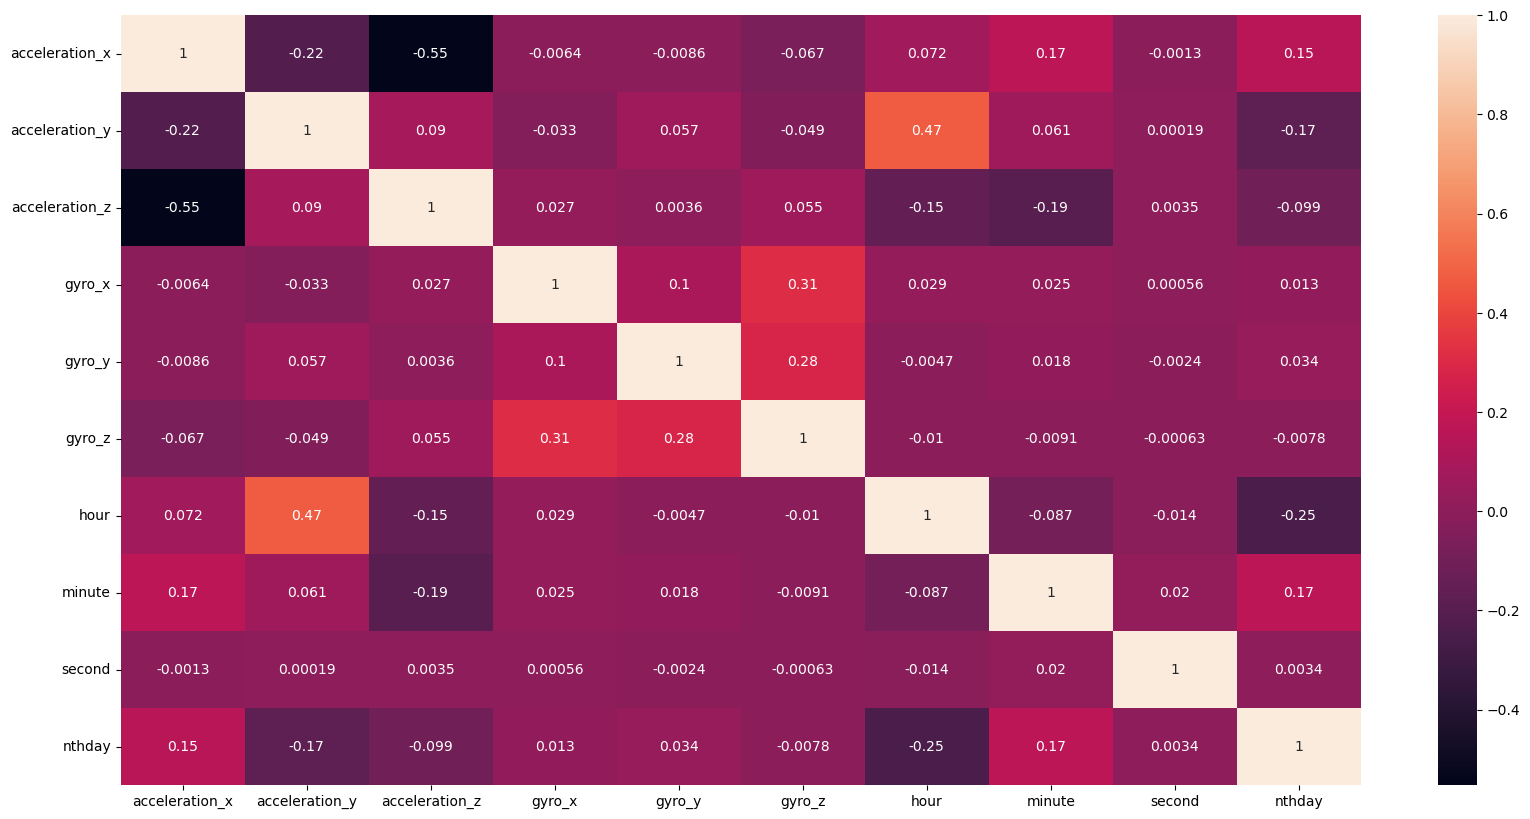

In [118]:
# HeatMap
plt.figure(figsize=(20,10))
sns.heatmap(data_corr.corr(),annot=True)

    * There is no clear correlation between colummns so no need drop any of the columns.

# Data Analysis Report

   **'acceleration_x,' 'acceleration_y,' 'acceleration_z':**

    * These columns represent acceleration data along the X, Y, and Z axes, respectively.
    * The mean and standard deviation of these columns provide information about the average and spread of acceleration 
      values during the recorded activities.
    * The minimum and maximum values indicate the range of acceleration observed during the activities.
    * When 'acceleration_x' is between -1 and 1, it implies the user is walking.
    * If 'acceleration_x' is between -4 and 4, the user is running.
    * If 'acceleration_y' is between -2 and 0, the user is walking.
    * When 'acceleration_y' is between -2 and 2, the user is running.
    * When 'acceleration_z' is between -1 and 0, the user is walking.
    * If 'acceleration_z' is between -3 and 1, the user is running.
    
   **'gyro_x,' 'gyro_y,' 'gyro_z':**
   
    * These columns represent gyroscope data along the X, Y, and Z axes, respectively.
    * Similar to the acceleration columns, the mean, standard deviation, minimum, and maximum values provide insights 
      into the gyroscope measurements during the activities.
    * When 'gyro_x' is between -3 and 3, it implies the user is walking.
    * If 'gyro_x' is between -4 and 4, the user is running.
    * If 'gyro_y' is between -4 and 4, the user is walking.
    * When 'gyro_y' is between -6 and 6, the user is running.
    * If 'gyro_z' is between -5 and 5, it suggests the user is walking.
    * When 'gyro_z' is between -4.5 and 4.5, the user is running.
    
## Summary

    The dataset does not follow a normal distribution due to the inherent variability in a person's daily routine, 
    especially in walking and running habits. Box plots reveal outliers in columns related to 'activity,' 'acceleration,
    ' and 'gyro' data. There is no strong correlation between columns, suggesting all may be valuable for analysis 
    without a need for immediate column removal.

# Split the data Into Train and Test

In [75]:
x=data1.drop('activity',axis=1)

In [76]:
x.shape

(88588, 10)

In [77]:
y=data1['activity']

In [78]:
y.shape

(88588,)

In [79]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

### 3D Formation

    *converting the training and testing data into 3d formates to using them in LSTM model



In [80]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_test,y_test=np.array(x_test),np.array(y_test)

In [81]:
# use window function to evaluate the model
window_size = 10

# Create empty lists to store the generated sequences#
train_x = []
train_y = []

# Generate the sequences using sliding window
for i in range(len(x_train) - window_size + 1):
    window_data = x_train[i:i+window_size]
    target = y_train[i+window_size-1]
    train_x.append(window_data)
    train_y.append(target)

In [82]:
window_size = 10

# Create empty lists to store the generated sequences
test_x = []
test_y = []

# Generate the sequences using sliding window
for i in range(len(x_test) - window_size + 1):
    window_data = x_test[i:i+window_size]
    target = y_test[i+window_size-1]
    test_x.append(window_data)
    test_y.append(target)

In [83]:
train_x,train_y=np.array(train_x),np.array(train_y)
test_x,test_y=np.array(test_x),np.array(test_y)

In [84]:
#reshape the data
train_x = train_x.reshape(train_x.shape[0], window_size, train_x.shape[2])

In [85]:
# reshape the data
test_x = test_x.reshape(test_x.shape[0], window_size, test_x.shape[2])

In [87]:
train_x.shape

(62002, 10, 10)

In [88]:
test_x.shape

(26568, 10, 10)

### Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

# Model Creation

## LSTM Model

In [148]:
# import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from keras.utils import to_categorical

In [154]:
model1=Sequential()
model1.add(LSTM(units=64, input_shape=(window_size, 10)))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [155]:
history=model1.fit(train_x,train_y,epochs=20,validation_split=0.2,batch_size=32)

Epoch 1/20
1551/1551 [==============================] - 18s 10ms/step - loss: 0.1284 - accuracy: 0.9539 - val_loss: 0.0612 - val_accuracy: 0.9773
Epoch 2/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0514 - accuracy: 0.9798 - val_loss: 0.0454 - val_accuracy: 0.9830
Epoch 3/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0396 - accuracy: 0.9840 - val_loss: 0.0345 - val_accuracy: 0.9864
Epoch 4/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0328 - accuracy: 0.9865 - val_loss: 0.0319 - val_accuracy: 0.9867
Epoch 5/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0282 - accuracy: 0.9888 - val_loss: 0.0293 - val_accuracy: 0.9881
Epoch 6/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0246 - accuracy: 0.9903 - val_loss: 0.0246 - val_accuracy: 0.9911
Epoch 7/20
1551/1551 [==============================] - 11s 7ms/step - loss: 0.0211 - accuracy: 0.9919 - val_loss: 0.0245 - val_a

In [122]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                19200     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19265 (75.25 KB)
Trainable params: 19265 (75.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
y_pred=model1.predict(test_x)

831/831 [==============================] - 4s 4ms/step


In [124]:
y_pred.shape

(26568, 1)

In [125]:
y_pred=np.where(y_pred<0.5,0,1)

## Model Evalution

In [126]:
# import libraries
from sklearn.metrics import confusion_matrix,classification_report

In [127]:
# classification report
print(classification_report(y_test[9:],y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13372
           1       0.99      0.99      0.99     13196

    accuracy                           0.99     26568
   macro avg       0.99      0.99      0.99     26568
weighted avg       0.99      0.99      0.99     26568



In [128]:
# Confusion Matrix
print(confusion_matrix(y_test[9:],y_pred))

[[13305    67]
 [   97 13099]]


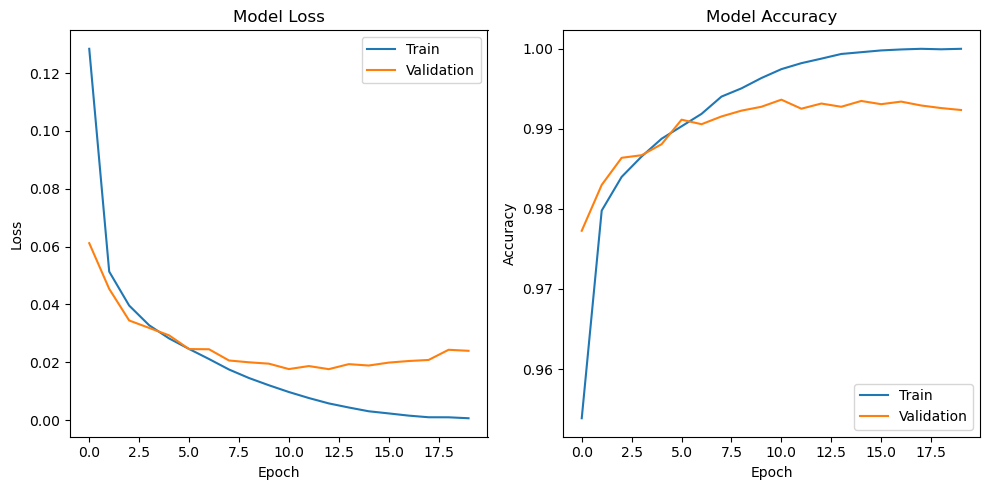

In [156]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


     The LSTM classification model achieved an impressive accuracy of 99%, showcasing its ability to correctly 
     classify instances. Its confusion matrix revealed minimal false positives and false negatives, indicating
     strong discrimination between positive and negative cases. 

## ANN Model

In [113]:
#import Libraries
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=2)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)

In [114]:
y_train_pred=mlp.predict(x_train)

## Model Evaluation

In [115]:
#import Libraries
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [116]:
# Accuracy score
print("Train accuracy :",accuracy_score(y_train,y_train_pred))
print("Test accuracy :",accuracy_score(y_test,y_pred))

Train accuracy : 0.9970972891906275
Test accuracy : 0.996086842006246


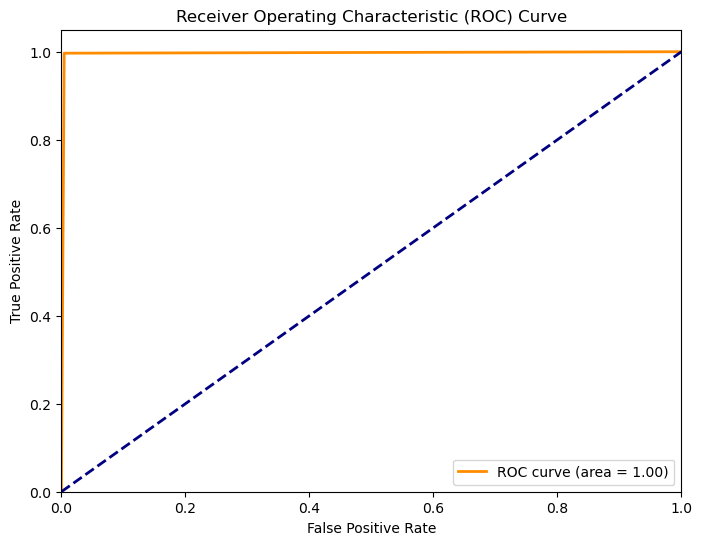

In [117]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


     An artificial neural network (ANN) model with an accuracy score of 99% and an ROC curve with an area under 
     the curve (AUC) of 1.0 indicates that your model is performing exceptionally well on the classification task.

## Summary

     The LSTM classification model, designed for walk and run classification, achieved a remarkable accuracy of 99%, 
     signifying its proficiency in accurately distinguishing between walking and running activities. Its minimal false 
     positives and false negatives, as depicted in the confusion matrix, underscore its strong discriminatory capabilities.
     Additionally, the model's ROC curve with an AUC of 1.0 further affirms its exceptional performance, making it a
     robust choice for the task of classifying walk and run activities.

## Model Comparison Report
    
    LSTM model Accuracy Score - 99%
    ANN model Accuracy Score  - 99%
    
    Both models, the ANN and the LSTM, achieved an outstanding accuracy of 99% in classifying walk and run activities,
    highlighting their strong predictive abilities. The ANN's AUC of 1.0 in the ROC curve indicates perfect discrimination
    between the two classes, while the LSTM's minimal false positives and false negatives in the confusion matrix emphasize
    its precision. Choosing the best model depends on factors such as interpretability, computational resources, and the 
    nature of the data, with the ANN excelling in terms of discrimination and the LSTM excelling in handling sequential 
    time series data.


# Report on Challenges faced and Technique used

     Creating a walk-run classification model using LSTM (Long Short-Term Memory) can be effective for time series 
     data like accelerometer and gyroscope measurements. However, it also presents several challenges and solutions:
     
   **Data Quality and Preprocessing:**

     Challenge: Ensuring data quality, handling missing values, and preparing time series data for modeling can be
                time-consuming.
     Solution: Impute missing values, normalize or scale features, and segment time series data into sequences.
   **Feature Engineering:**

     Challenge: Selecting relevant features from raw sensor data is crucial for model performance.
     Solution: Experiment with various feature extraction techniques and domain knowledge to create
               informative input features.
   **Model Complexity:**

     Challenge: LSTM and ANN models can be computationally intensive and may require significant resources 
                for training.
     Solution: Optimize hyperparameters, use GPU acceleration, and consider model simplification if necessary.
   **Validation and Testing:**

     Challenge: Proper data splitting and validation are critical to assess model performance accurately.
     Solution: Use techniques like time-based splitting and k-fold cross-validation for robust evaluation.
     
   